In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Loading Modules
import warnings; warnings.simplefilter('ignore')
from IPython.core.display import display, HTML

sns.set(style="ticks", color_codes=True)

In [2]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Algorithms for Base Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load Data & Data Exploration

In [3]:
df = pd.read_csv('telco_churn_data.csv')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [4]:
# melihat info dari tiap kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [5]:
# melihat ukuran baris x kolom dataset
df.shape

(7043, 46)

In [6]:
# cek jumlah nilai null tiap kolom
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

[note] kolom churn kategory, churn reason, customer satisfaction didrop saja

In [7]:
# melihat baris yang duplikasi jika ada
df.duplicated().sum()

0

In [8]:
churn = df.copy()

# Data transformation
churn.insert(30, 'Middle Citizen', np.where((churn['Age']>=30) & (churn['Age']<65), "Yes", "No"))

# rename kolom tabel
churn = churn.rename(columns={'Under 30':'Junior Citizen'})

# drop column
churn.drop(['Age','Zip Code','Latitude','Longitude','Churn Category','Churn Reason','Customer Satisfaction','City','Population'], axis=1, inplace=True)

# additional drop column 
churn.drop(['Customer ID','Offer','CLTV'], axis=1, inplace=True)

# change value in churn value column with yes/no
#churn['Churn Value'] = churn['Churn Value'].map({1:'Yes', 0:'No'})

churn.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Gender,Junior Citizen,Middle Citizen,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported
0,No,0,1,No,0.00,No,Yes,Fiber Optic,9,No,...,Male,No,No,Yes,No,No,0,1,5,0
1,Yes,1,8,Yes,48.85,Yes,Yes,Cable,19,No,...,Female,No,No,Yes,Yes,Yes,1,1,5,0
2,No,0,18,Yes,11.33,Yes,Yes,Fiber Optic,57,No,...,Male,No,No,Yes,No,Yes,3,1,1,0
3,Yes,1,25,Yes,19.76,No,Yes,Fiber Optic,13,No,...,Female,No,No,Yes,Yes,Yes,1,1,1,1
4,Yes,1,37,Yes,6.33,Yes,Yes,Cable,15,No,...,Female,No,No,Yes,Yes,Yes,1,1,1,0


In [9]:
# cek nilai null 
churn.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Gender                   

In [10]:
# change datatype object to category
for col in churn.columns:
  if churn[col].dtype == 'object':
    churn[col] = churn[col].astype('category')

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Referred a Friend                  7043 non-null   category
 1   Number of Referrals                7043 non-null   int64   
 2   Tenure in Months                   7043 non-null   int64   
 3   Phone Service                      7043 non-null   category
 4   Avg Monthly Long Distance Charges  7043 non-null   float64 
 5   Multiple Lines                     7043 non-null   category
 6   Internet Service                   7043 non-null   category
 7   Internet Type                      7043 non-null   category
 8   Avg Monthly GB Download            7043 non-null   int64   
 9   Online Security                    7043 non-null   category
 10  Online Backup                      7043 non-null   category
 11  Device Protection Plan             7043 non

In [11]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

## Customer Distribution

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object
mode:  0    Male
Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male']
Male      3555
Female    3488
Name: Gender, dtype: int64


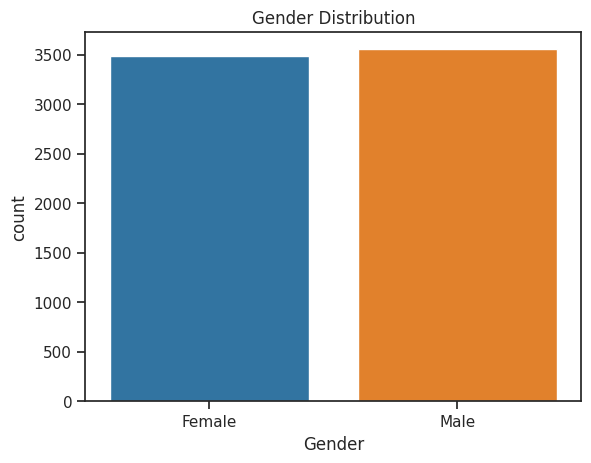

In [12]:
# Feature Variable: Gender
palette = ['tab:blue', 'tab:orange','tab:green','tab:red']
plt.title('Gender Distribution')
categorical_summarized(churn, x = 'Gender', palette=palette)

[Text(0.5, 1.0, 'Contract by Churn Value Distribution')]

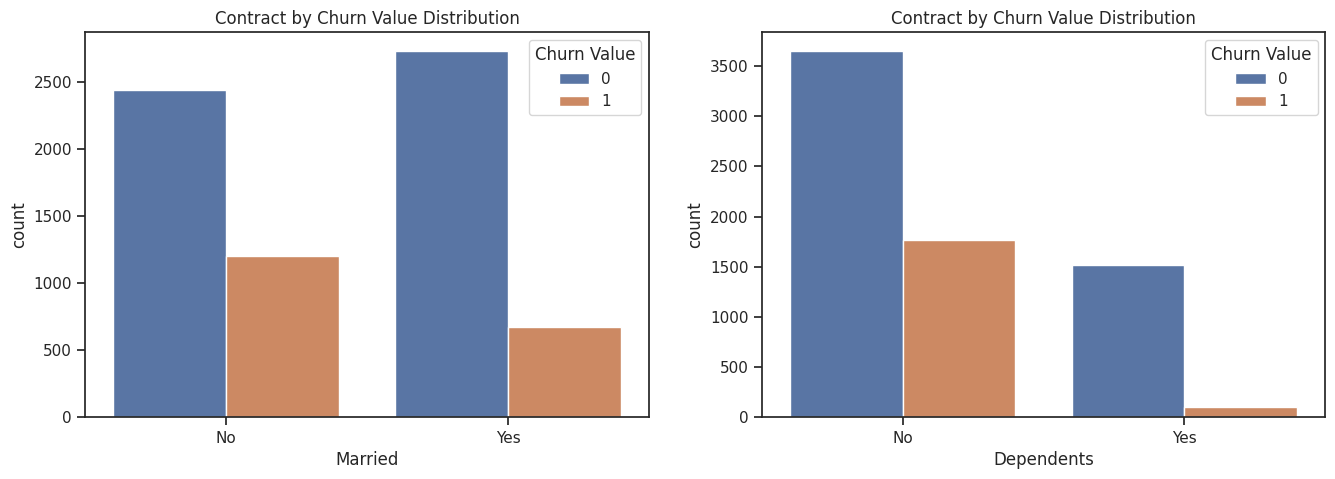

In [13]:
# Married & Dependents by Churn Value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.countplot(x="Married", hue="Churn Value", data=churn, ax=axes[0]).set(title='Contract by Churn Value Distribution')
sns.countplot(x="Dependents", hue="Churn Value", data=churn, ax=axes[1]).set(title='Contract by Churn Value Distribution')

## Churn Distribution

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64
mode:  0    0
Name: Churn Value, dtype: int64
0    5174
1    1869
Name: Churn Value, dtype: int64


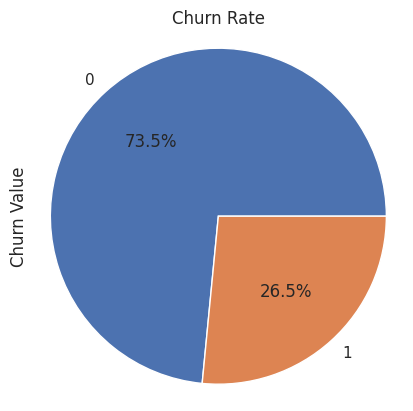

In [14]:
# Distribution of churn value
series = churn['Churn Value']
print(series.describe())
print('mode: ', series.mode())
print('='*80)
print(series.value_counts())

churn['Churn Value'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('scaled')
plt.title('Churn Rate')
plt.show()

<Axes: title={'center': 'Distribution of Gender by Monthly Charge'}, xlabel='Monthly Charge', ylabel='Gender'>

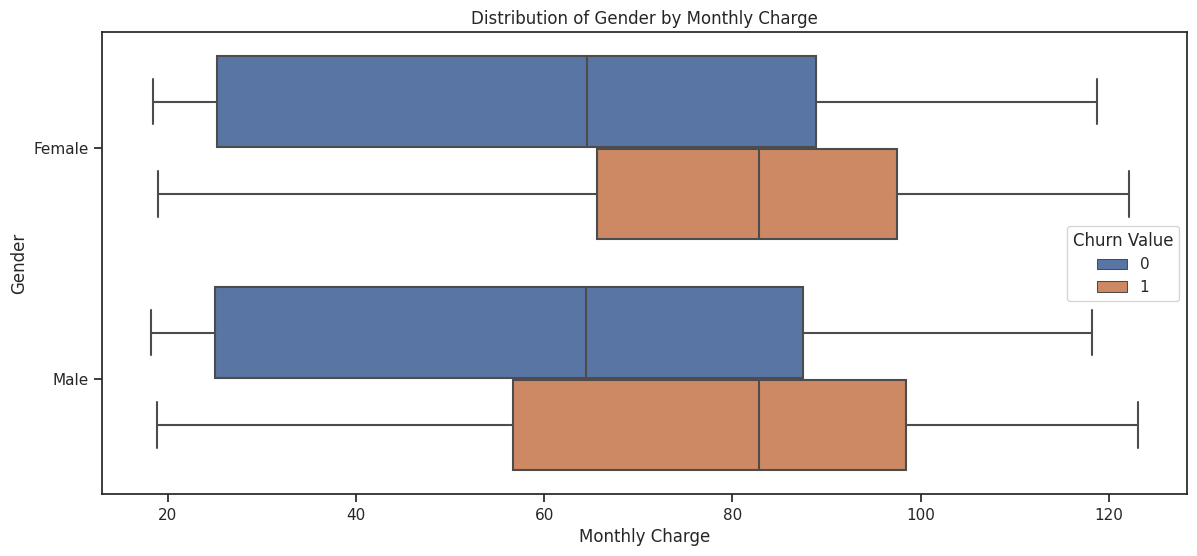

In [15]:
# Gender,Monthly Charge by Churn Value
fig, ax = plt.subplots(figsize=(14,6))
plt.title('Distribution of Gender by Monthly Charge')
sns.boxplot(data=churn, x='Monthly Charge', y='Gender', hue='Churn Value')

## Account Distribution

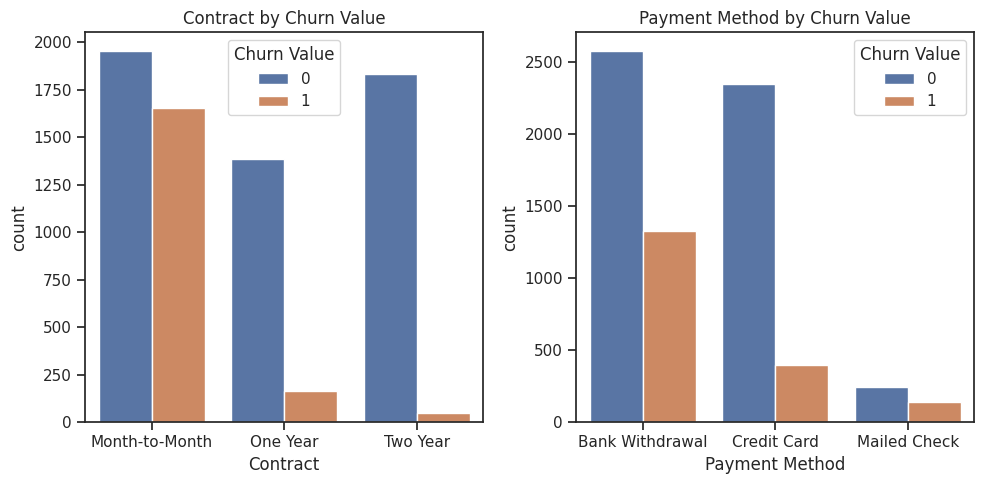

In [16]:
# distribution of contract, payment method by churn value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.countplot(x="Contract", hue="Churn Value", data=churn, ax=axes[0]).set(title='Contract by Churn Value')
sns.countplot(x="Payment Method", hue="Churn Value", data=churn, ax=axes[1]).set(title='Payment Method by Churn Value')
        
plt.tight_layout()
plt.show()

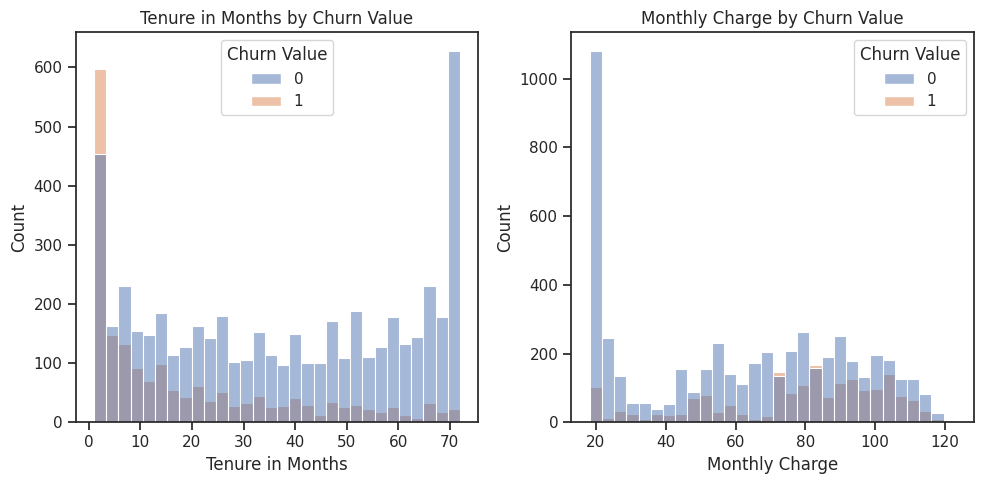

In [17]:
# distribution of tenure in month & monthly charge by churn value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(data=churn, x="Tenure in Months", hue='Churn Value', bins=30, ax=axes[0]).set(title='Tenure in Months by Churn Value')
sns.histplot(data=churn, x="Monthly Charge", hue='Churn Value', bins=30, ax=axes[1]).set(title='Monthly Charge by Churn Value')

plt.tight_layout()
plt.show()

In [18]:
print(churn['Monthly Charge'].describe())

count    7043.000000
mean       65.538800
std        30.606805
min        18.250000
25%        35.890000
50%        71.968000
75%        90.650000
max       123.084000
Name: Monthly Charge, dtype: float64


## menjawab problem statement

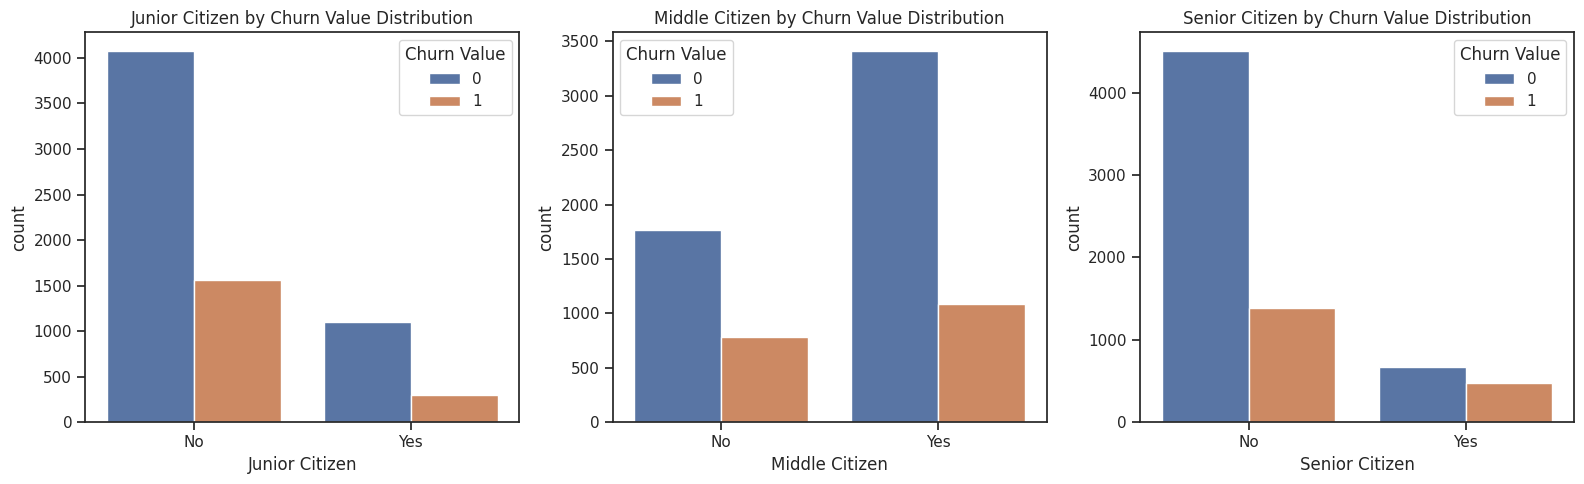

In [19]:
# distribution of contract, payment method, internet type by churn value
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.countplot(x="Junior Citizen", hue="Churn Value", data=churn, ax=axes[0]).set(title='Junior Citizen by Churn Value Distribution')
sns.countplot(x="Middle Citizen", hue="Churn Value", data=churn, ax=axes[1]).set(title='Middle Citizen by Churn Value Distribution')
sns.countplot(x="Senior Citizen", hue="Churn Value", data=churn, ax=axes[2]).set(title='Senior Citizen by Churn Value Distribution')
        
plt.tight_layout()
plt.show()

count     7043
unique       2
top        Yes
freq      6361
Name: Phone Service, dtype: object
mode:  0    Yes
Name: Phone Service, dtype: category
Categories (2, object): ['No', 'Yes']
Yes    6361
No      682
Name: Phone Service, dtype: int64


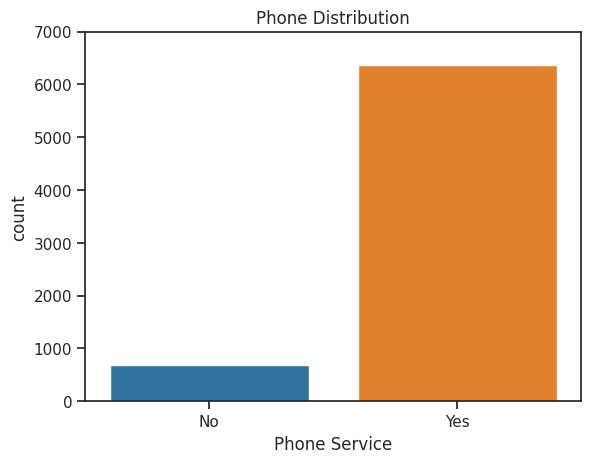

In [20]:
# Feature Variable: Phone Service
palette = ['tab:blue', 'tab:orange','tab:green','tab:red']
plt.title('Phone Distribution')
plt.ylim(0, 7000)
categorical_summarized(churn, x = 'Phone Service', palette=palette)

count     7043
unique       2
top        Yes
freq      5517
Name: Internet Service, dtype: object
mode:  0    Yes
Name: Internet Service, dtype: category
Categories (2, object): ['No', 'Yes']
Yes    5517
No     1526
Name: Internet Service, dtype: int64


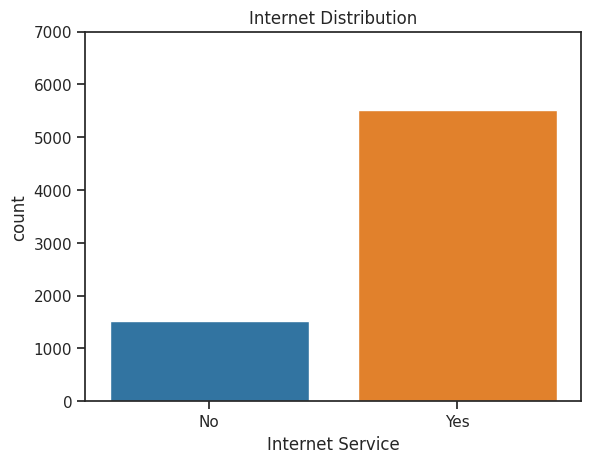

In [21]:
# Feature Variable: Internet Service
palette = ['tab:blue', 'tab:orange','tab:green','tab:red']
plt.title('Internet Distribution')
plt.ylim(0, 7000)
categorical_summarized(churn, x = 'Internet Service', palette=palette)

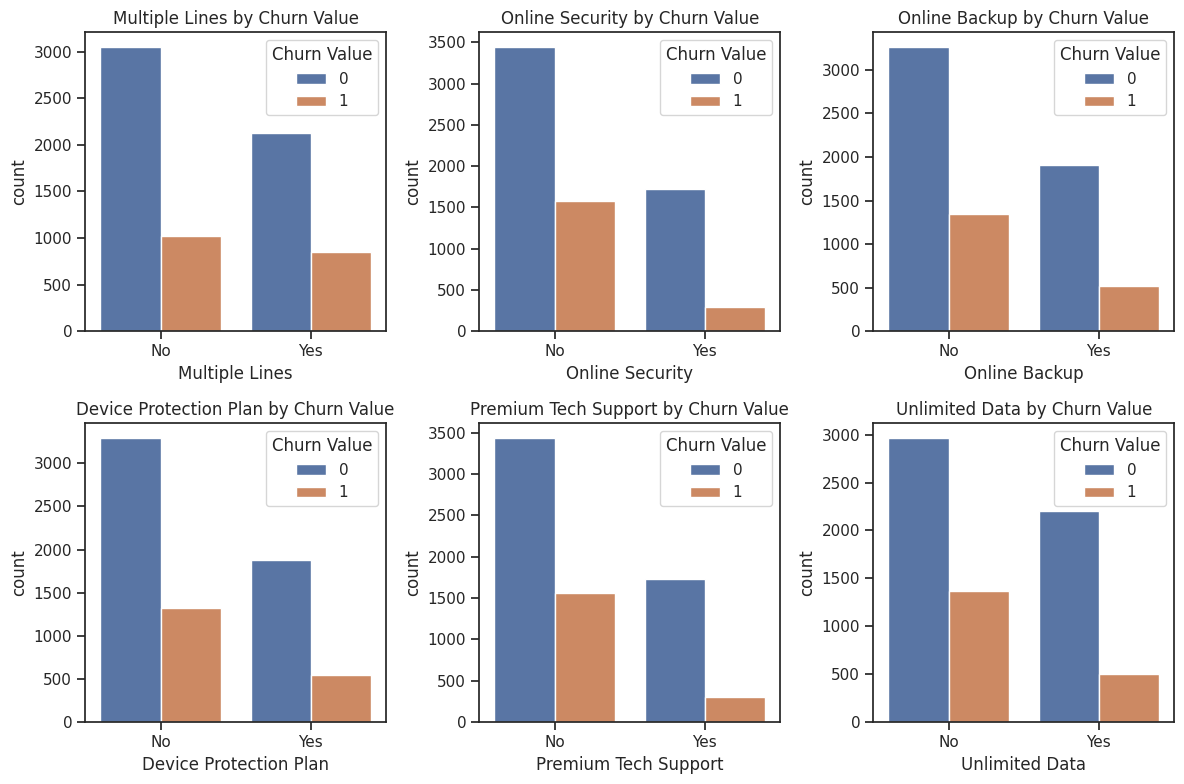

In [22]:
# extra service distribution by churn value
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sns.countplot(x='Multiple Lines', hue="Churn Value", data=churn, ax=axes[0,0]).set(title='Multiple Lines by Churn Value')
sns.countplot(x='Online Security', hue="Churn Value", data=churn, ax=axes[0,1]).set(title='Online Security by Churn Value')
sns.countplot(x='Online Backup', hue="Churn Value", data=churn, ax=axes[0,2]).set(title='Online Backup by Churn Value')
sns.countplot(x='Device Protection Plan', hue="Churn Value", data=churn, ax=axes[1,0]).set(title='Device Protection Plan by Churn Value')
sns.countplot(x='Premium Tech Support', hue="Churn Value", data=churn, ax=axes[1,1]).set(title='Premium Tech Support by Churn Value')
sns.countplot(x='Unlimited Data', hue="Churn Value", data=churn, ax=axes[1,2]).set(title='Unlimited Data by Churn Value')
        
plt.tight_layout()
plt.show()

## Correlation metrix

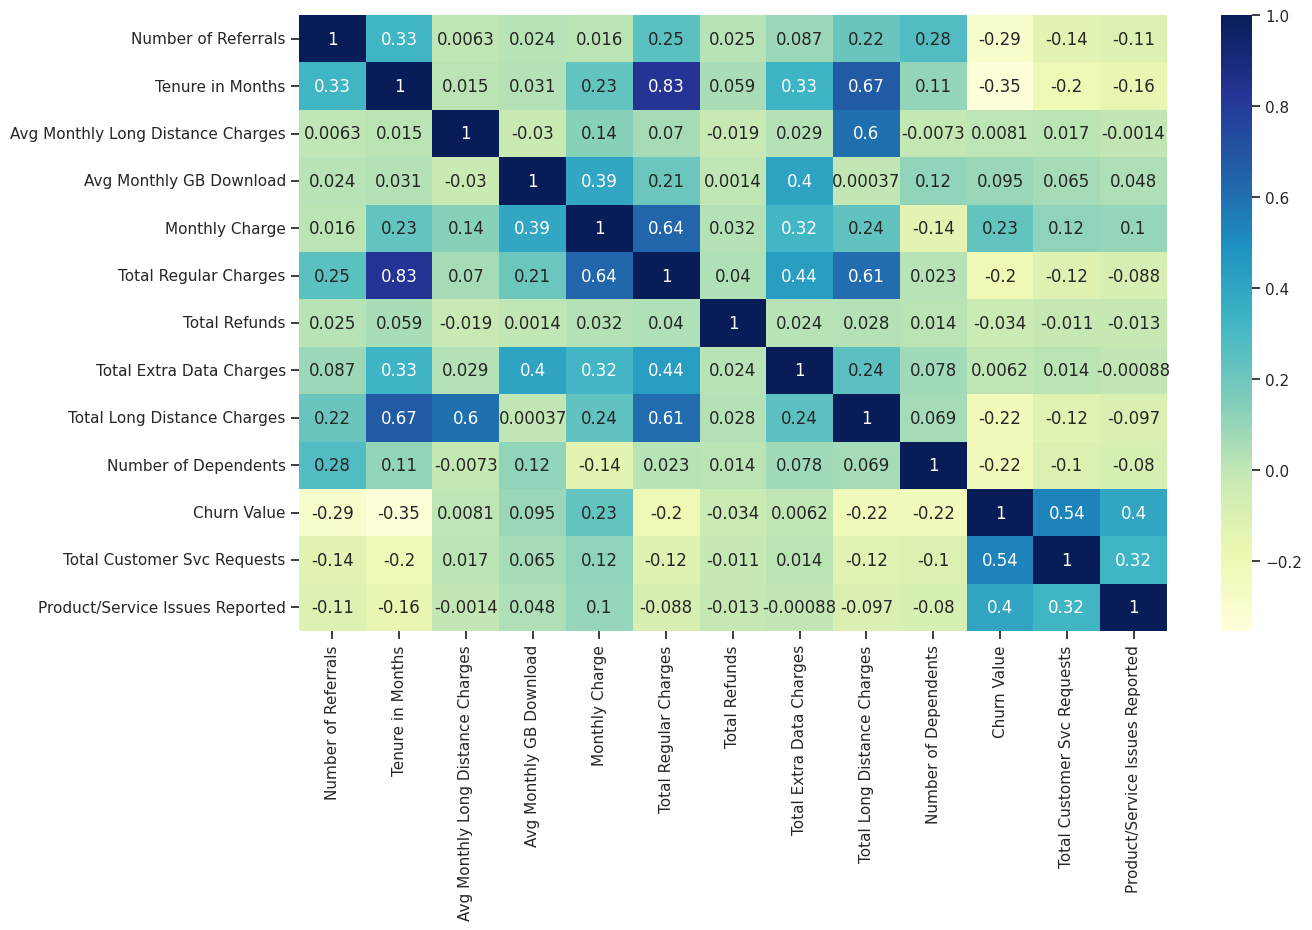

In [23]:
# plot heatmap korelasi antar kolom
figure, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(churn.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Modelling

## Preprocessing

### Feature Selection

In [24]:
# Define X for feature and y for label
X = churn.drop(['Churn Value'], axis=1)
y = churn['Churn Value']

# Change Gender value to numeric
X['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

# change all yes,no value to 1,0
X.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)

# Change value in Churn Value into Yes and No
y.replace(to_replace=[1,0], value=['Yes','No'],inplace=True)

In [25]:
X

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Total Long Distance Charges,Gender,Junior Citizen,Middle Citizen,Senior Citizen,Married,Dependents,Number of Dependents,Total Customer Svc Requests,Product/Service Issues Reported
0,0,0,1,0,0.00,0,1,Fiber Optic,9,0,...,0.00,0,0,0,1,0,0,0,5,0
1,1,1,8,1,48.85,1,1,Cable,19,0,...,390.80,1,0,0,1,1,1,1,5,0
2,0,0,18,1,11.33,1,1,Fiber Optic,57,0,...,203.94,0,0,0,1,0,1,3,1,0
3,1,1,25,1,19.76,0,1,Fiber Optic,13,0,...,494.00,1,0,0,1,1,1,1,1,1
4,1,1,37,1,6.33,1,1,Cable,15,0,...,234.21,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,22.77,0,0,None,0,0,...,1639.44,1,0,1,0,0,0,0,0,0
7039,1,1,24,1,36.05,1,1,DSL,24,1,...,865.20,0,0,1,0,1,1,2,2,0
7040,1,4,72,1,29.66,1,1,Cable,59,0,...,2135.52,1,0,1,0,1,1,2,2,0
7041,1,1,11,0,0.00,0,1,DSL,17,1,...,0.00,1,0,1,0,1,1,2,0,0


In [26]:
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn Value, Length: 7043, dtype: object

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Referred a Friend                  7043 non-null   category
 1   Number of Referrals                7043 non-null   int64   
 2   Tenure in Months                   7043 non-null   int64   
 3   Phone Service                      7043 non-null   category
 4   Avg Monthly Long Distance Charges  7043 non-null   float64 
 5   Multiple Lines                     7043 non-null   category
 6   Internet Service                   7043 non-null   category
 7   Internet Type                      7043 non-null   category
 8   Avg Monthly GB Download            7043 non-null   int64   
 9   Online Security                    7043 non-null   category
 10  Online Backup                      7043 non-null   category
 11  Device Protection Plan             7043 non

### Split Data Train Test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape )
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 34) (5634,)
Test set: (1409, 34) (1409,)


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2920 to 2732
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Referred a Friend                  5634 non-null   category
 1   Number of Referrals                5634 non-null   int64   
 2   Tenure in Months                   5634 non-null   int64   
 3   Phone Service                      5634 non-null   category
 4   Avg Monthly Long Distance Charges  5634 non-null   float64 
 5   Multiple Lines                     5634 non-null   category
 6   Internet Service                   5634 non-null   category
 7   Internet Type                      5634 non-null   category
 8   Avg Monthly GB Download            5634 non-null   int64   
 9   Online Security                    5634 non-null   category
 10  Online Backup                      5634 non-null   category
 11  Device Protection Plan             5634 

### One Hot Encoding & Transformation

In [30]:
X_train = pd.concat([X_train.drop(['Internet Type','Contract','Payment Method'], axis=1), pd.get_dummies(X_train[['Internet Type','Contract','Payment Method']])], axis=1)
X_test = pd.concat([X_test.drop(['Internet Type','Contract','Payment Method'], axis=1), pd.get_dummies(X_test[['Internet Type','Contract','Payment Method']])], axis=1)

In [31]:
# function to change datatype into category
def change_to_category(dataframe):
  for col in dataframe.columns:
    if dataframe[col].dtype == 'uint8':
      dataframe[col] = dataframe[col].astype('category')
  
  select=['Referred a Friend','Phone Service', 'Multiple Lines','Internet Service','Online Security', 'Online Backup', 
        'Device Protection Plan','Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music', 'Unlimited Data', 
        'Paperless Billing','Gender', 'Junior Citizen','Middle Citizen', 'Senior Citizen', 'Married', 'Dependents',]
  for col in dataframe[select].columns:
    if dataframe[col].dtype == 'int64':
      dataframe[col] = dataframe[col].astype('category')


In [32]:
change_to_category(X_train)
change_to_category(X_test)
print(X_train.shape)

(5634, 41)


In [33]:
X_column = X_train.columns

### Normalize Data

In [34]:
#X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
#X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
#X[0:5]

## Classification

### Random Forest Classifier

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [36]:
print(metrics.accuracy_score(y_test, pred_rf)*100)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

90.84457061745918
[[990  46]
 [ 83 290]]
              precision    recall  f1-score   support

          No       0.92      0.96      0.94      1036
         Yes       0.86      0.78      0.82       373

    accuracy                           0.91      1409
   macro avg       0.89      0.87      0.88      1409
weighted avg       0.91      0.91      0.91      1409



#### Feature Importances Using Random Forest

<Axes: >

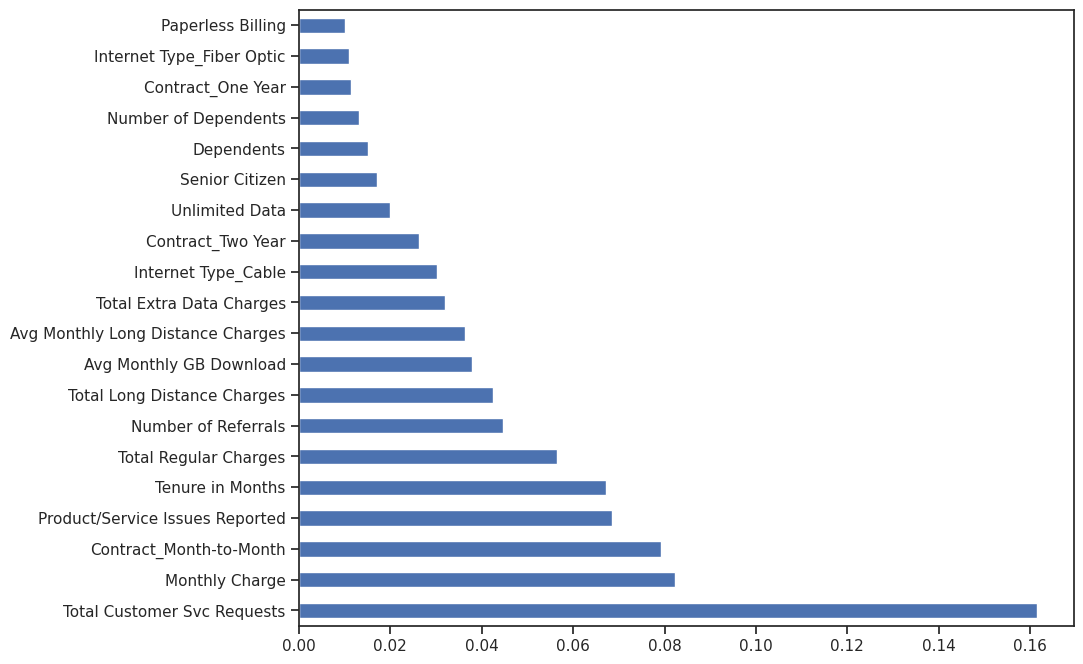

In [37]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

<Axes: >

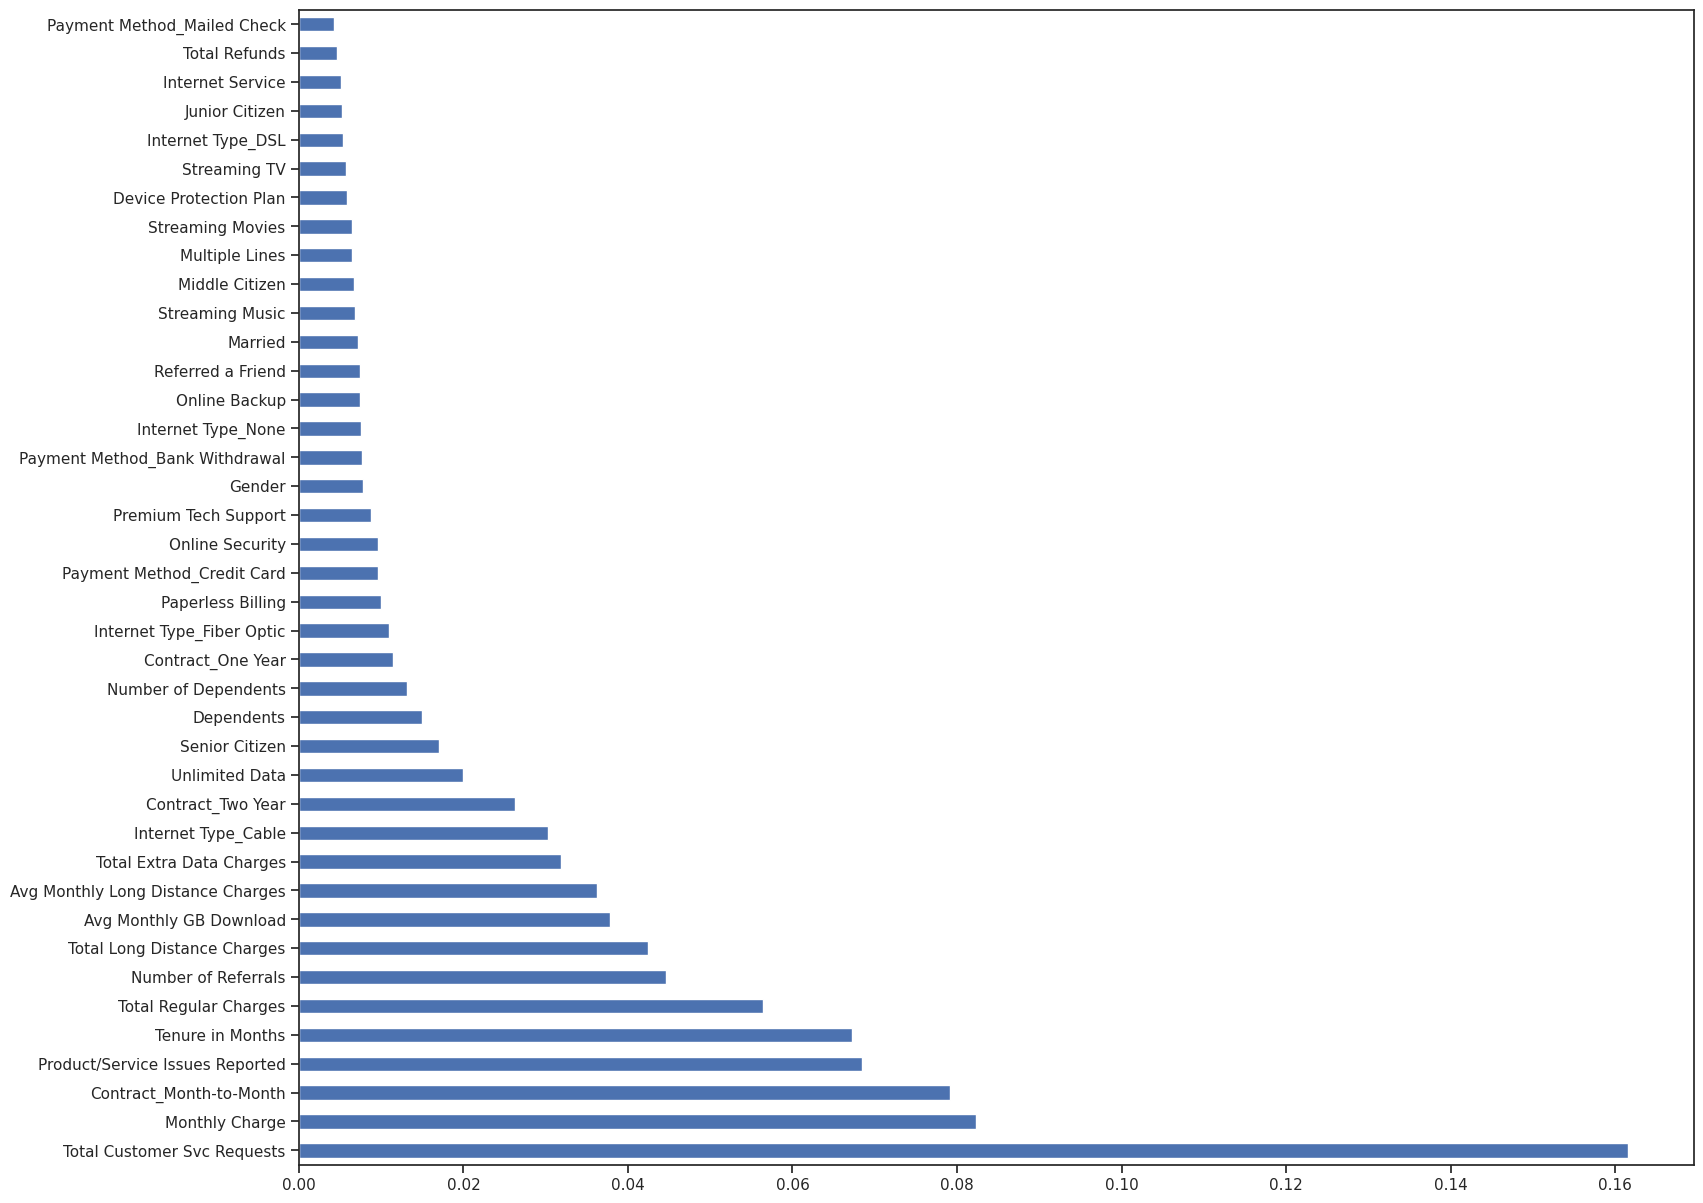

In [38]:
plt.figure(figsize=(18,15))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(40).plot(kind='barh')